# Type of Outliers

## 1. Point or Global Outliers

A data point is considered as a global outlier if it's value if far outside the entirety of the data set.


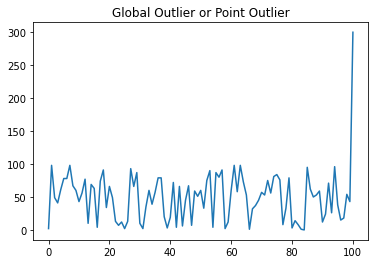

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
lst = [random.randint(0,100) for i in range(0,100)]
global_outlier = [300]
df = pd.DataFrame(lst+global_outlier)
plt.plot(df)
plt.title("Global Outlier or Point Outlier")
plt.show();

## 2. Contextual (Conditional) Outliers

if an individual data instance is anomalous in a specific context or condition then it is termed as contextual outlier.
* These are most common in time series data.
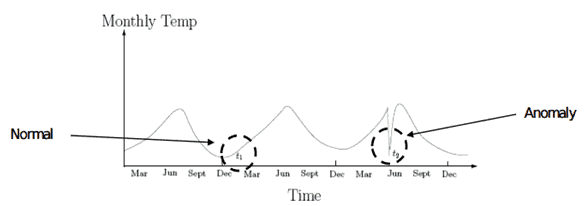


## 3.  Collective Outliers

A collection of data points is anomalous with respect to the entire data set but the values themselves are not anomalous. 
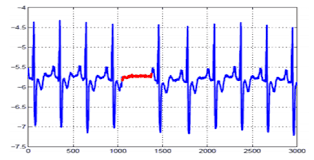

## How to Find Outliers

### Percentile

In [3]:
lst = [random.randint(0,100) for i in range(0,100)]
global_outlier = [300]
df = pd.DataFrame(lst+global_outlier,columns=['number'])
max_val = df.quantile(0.95)
min_val = df.quantile(0.05)
df[(df['number']<min_val[0])| (df['number']>max_val[0]) ]

,number
23,2
64,1
66,99
84,2
89,99
100,300


In [4]:
### TO REMOVE OUTLIER
df[(df['number']>min_val[0]) & (df['number']<max_val[0])]

,number
0,39
1,9
2,57
3,96
4,97
...,...
95,41
96,95
97,63
98,91


### Box Plot

A box plot is a graphical display for describing the distribution of data. Box plots use the median and the lower and upper quartiles.

<AxesSubplot:>

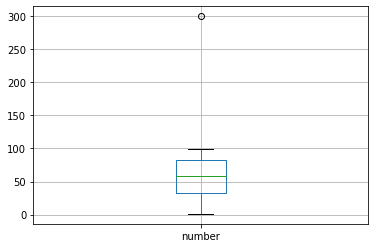

In [5]:
df.boxplot(column=['number'])

### Titanic Dataset

In [6]:
df = pd.read_csv('data/titanic_with_no_nan.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.589226,0.523008,0.381594,31.785634
std,257.353842,0.486592,0.836071,13.335837,1.102743,0.806057,49.703730
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


In [19]:
########## DETECTING OUTLIERS USING PERCENTILE ###############
df = pd.read_csv('data/titanic_with_no_nan.csv')
max_val = df.Age.quantile(0.95)
min_val = df.Age.quantile(0.05)
df2 = df[(df['Age']<min_val) | (df['Age']>max_val)]
print("Number of Outliers Detected in Age:",df2.shape[0])
df2

Number of Outliers Detected in Age: 86


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex,Name
7,8,0,3,2,3,1,21,B96 B98,S,male,"Palsson, Master. Gosta Leonard"
10,11,1,3,4,1,1,16,G6,S,female,"Sandstrom, Miss. Marguerite Rut"
11,12,1,1,58,0,0,26,C103,S,female,"Bonnell, Miss. Elizabeth"
15,16,1,2,55,0,0,16,B96 B98,S,female,"Hewlett, Mrs. (Mary D Kingcome)"
16,17,0,3,2,4,1,29,B96 B98,Q,male,"Rice, Master. Eugene"
...,...,...,...,...,...,...,...,...,...,...,...
831,832,1,2,0,1,1,18,B96 B98,S,male,"Richards, Master. George Sibley"
850,851,0,3,4,4,2,31,B96 B98,S,male,"Andersson, Master. Sigvard Harald Elias"
851,852,0,3,74,0,0,7,B96 B98,S,male,"Svensson, Mr. Johan"
869,870,1,3,4,1,1,11,B96 B98,S,male,"Johnson, Master. Harold Theodor"


<AxesSubplot:>

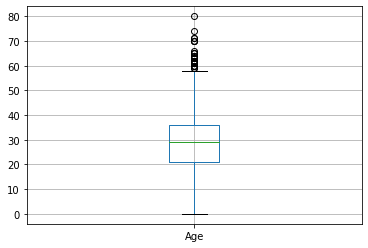

In [20]:
########## DETECTING OUTLIERS USING BOX PLOT ###############
df = pd.read_csv('data/titanic_with_no_nan.csv')
df.boxplot(column=['Age'])

C:\Users\abhay\Anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

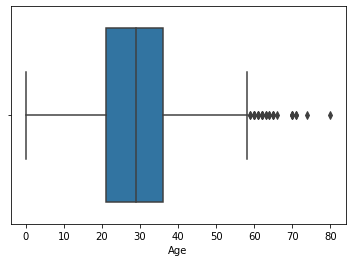

In [21]:
import seaborn as sns
sns.boxplot(df['Age'])

### Remove Outliers

## 1. Use Percentile (Removing Values)

Before Shape: (891, 11)
After Shape: (794, 11)


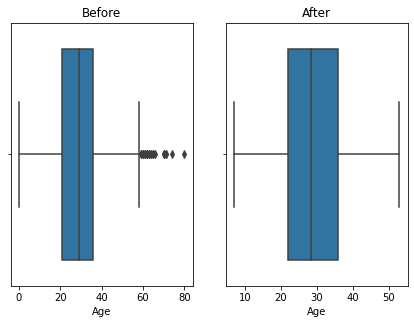

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
df = pd.read_csv('data/titanic_with_no_nan.csv')
print("Before Shape:",df.shape)
max_val = df.Age.quantile(0.95)
min_val = df.Age.quantile(0.05)
df2 = df[(df['Age']>min_val) & (df['Age']<max_val)]
print("After Shape:",df2.shape)
sns.boxplot(df['Age'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Age'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

## 2. Replacing Values Using Suitable Values

### Using Quantile Method

Previous Shape With Outlier:  (891, 11)
Shape After Removing Outliers: (891, 11)


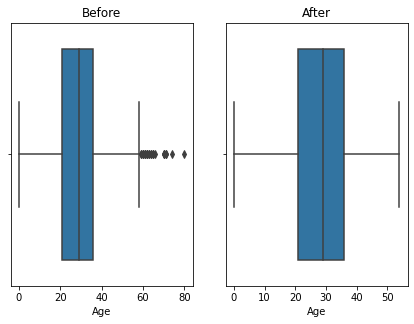

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
df = pd.read_csv('data/titanic_with_no_nan.csv')
print("Previous Shape With Outlier: ",df.shape)
sns.boxplot(df['Age'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
max_val = df.Age.quantile(0.95)
min_val = df.Age.quantile(0.05)

df2 = df
df2['Age'] = np.where(df2['Age']>max_val,max_val,df2['Age'])

print("Shape After Removing Outliers:", df2.shape)

sns.boxplot(df2['Age'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

### Using IQR

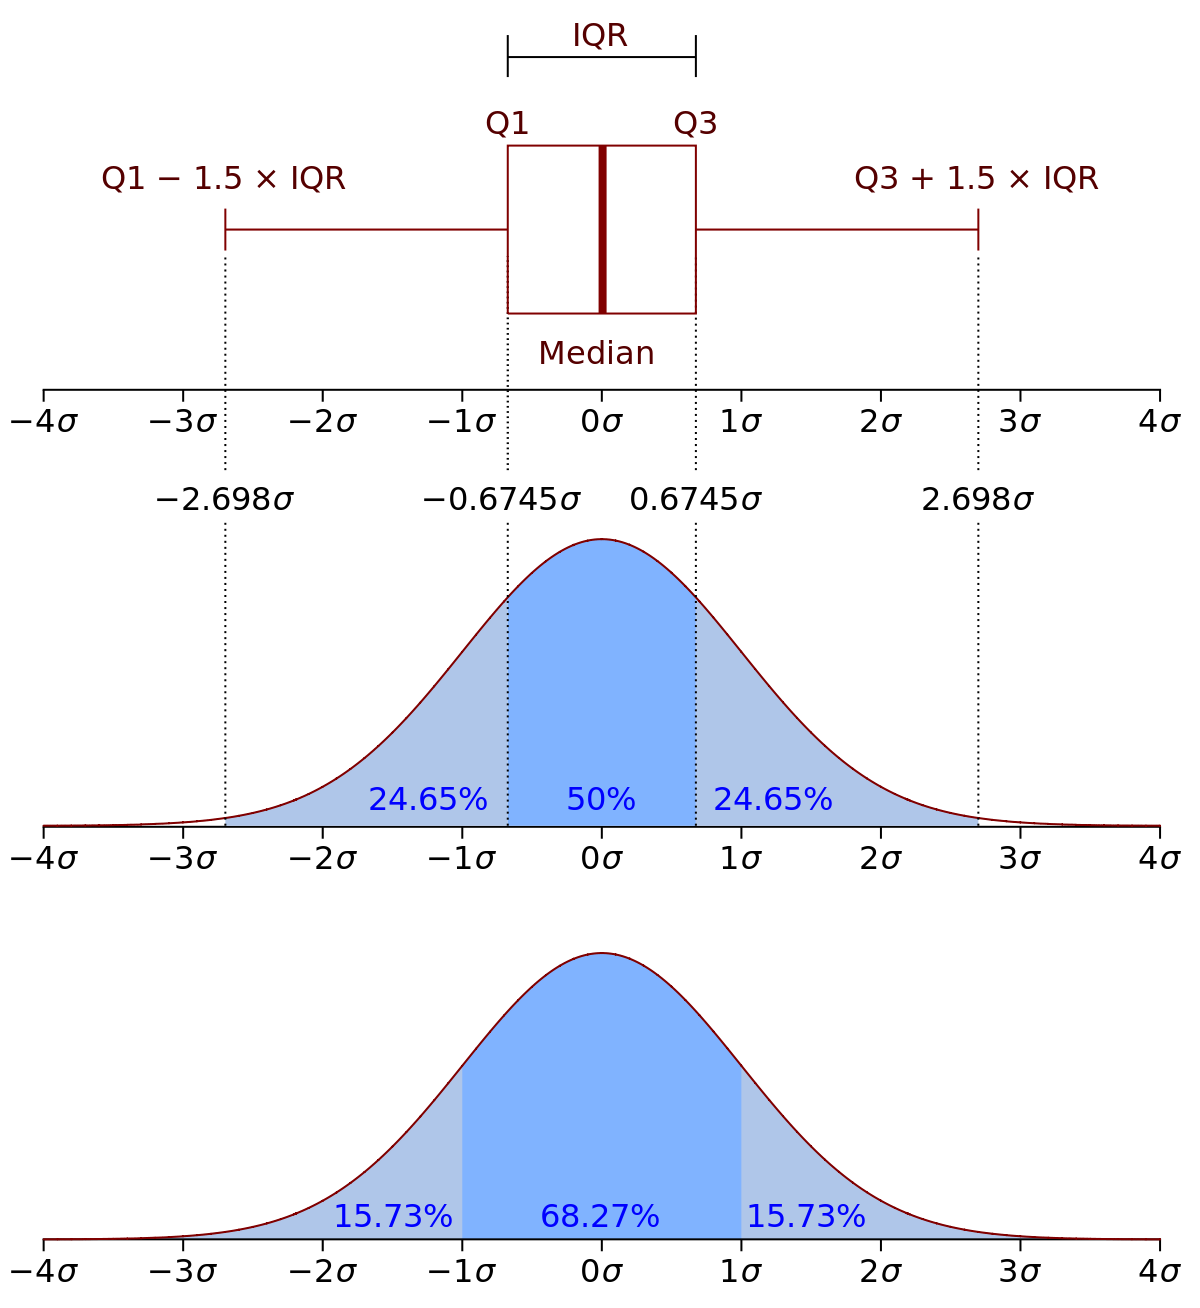

```
Q1 = df.column.quantile(0.25)
Q3 = df.column.quantile(0.75)

IQR = Q3-Q1

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
```

<AxesSubplot:>

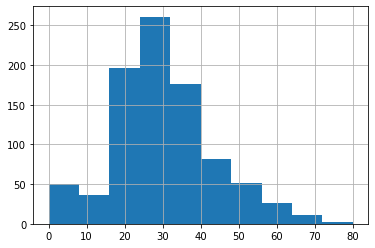

In [57]:
df = pd.read_csv('data/titanic_with_no_nan.csv')
df['Age'].hist()

Previous Shape With Outlier:  (891, 11)
21.0 36.0
15.0
-1.5 58.5
Shape After Removing Outliers: (891, 11)


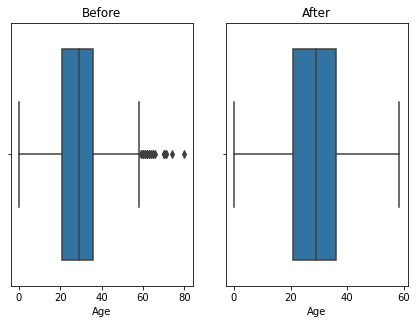

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df.shape)
sns.boxplot(df['Age'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
print(Q1,Q3)

IQR = Q3-Q1
print(IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)


df2 = df
df2['Age'] = np.where(df2['Age']>upper_limit,upper_limit,df2['Age'])
df2['Age'] = np.where(df2['Age']<lower_limit,lower_limit,df2['Age'])

print("Shape After Removing Outliers:", df2.shape)

sns.boxplot(df2['Age'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

## Using Strandard Deviation

<AxesSubplot:>

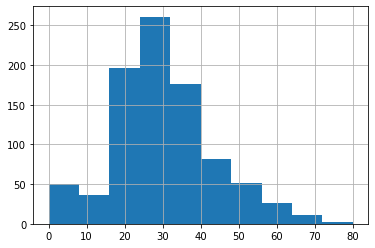

In [76]:
df = pd.read_csv('data/titanic_with_no_nan.csv')
df['Age'].hist()

In [77]:
upper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-10.418286473516577
69.59673765196776
29.589225589225588


(None, None, None)

Previous Shape With Outlier:  (891, 11)
Shape After Removing Outliers: (891, 11)


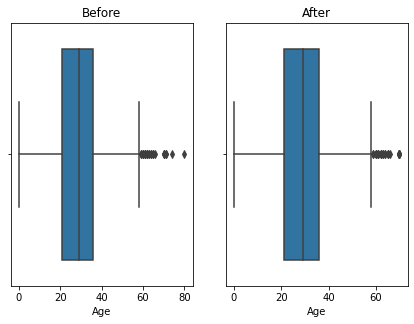

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df.shape)
sns.boxplot(df['Age'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
df2 = df
df2.loc[df2['Age']>=70,'Age']=70
df2.loc[df2['Age']<0,'Age']=0

print("Shape After Removing Outliers:", df2.shape)

sns.boxplot(df2['Age'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Some Outliers Has Been Removed

## If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of passenger')

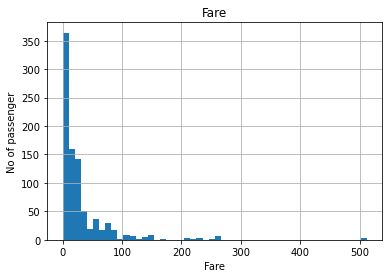

In [79]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

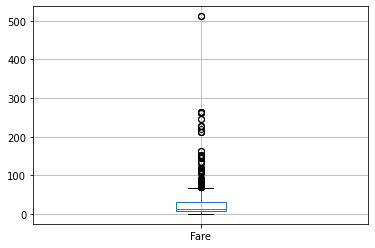

In [80]:
df.boxplot(column="Fare")

In [82]:
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge,upper_bridge)

-29.0 67.0


In [85]:
df.loc[df['Fare']>=70,'Fare']=70

Text(0, 0.5, 'No of passenger')

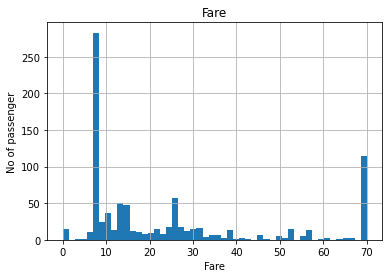

In [88]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

## Use a Different Machine Learning Model 

#### Algorithms that are sensitive to Outliers or Not??

1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM-------- Not Sensitive To Outliers
3. Linear Regression---------- Sensitive To Outliers
4. Logistic Regression------- Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive
10. PCA-------------------------- Sensitive
11. Neural Networks-------------- Sensitive
